In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [14]:
output_csv = 'D:/GitHub/Prediction of El-Nino Events/data/raw/nino.csv'

In [15]:
# Load the CSV file we just created
df = pd.read_csv(output_csv)
df['date'] = pd.to_datetime(df['date']).dt.date  # Remove time part
df = df.set_index('date')

print("Original data shape:", df.shape)

Original data shape: (16047, 1)


## Exploratory Data Analysis

In [4]:
# === COMPREHENSIVE DATA EXPLORATION ===

print("📅 DATE RANGE ANALYSIS:")
print("=" * 50)

# Date range information
print(f"Start date: {df.index.min()}")
print(f"End date: {df.index.max()}")
print(f"Total records: {len(df):,}")

# Calculate time span
start_date = pd.to_datetime(df.index.min())
end_date = pd.to_datetime(df.index.max())
time_span = end_date - start_date
print(f"Time span: {time_span.days:,} days ({time_span.days/365.25:.1f} years)")

# Check for missing dates
full_date_range = pd.date_range(start=start_date, end=end_date, freq='D')
df_dates = pd.to_datetime(df.index)
missing_dates = set(full_date_range) - set(df_dates)
print(f"Missing dates: {len(missing_dates):,}")

# Yearly data coverage
print(f"\n📊 YEARLY DATA COVERAGE:")
df_temp = df.copy()
df_temp.index = pd.to_datetime(df_temp.index)
yearly_counts = df_temp.groupby(df_temp.index.year).size()
print(f"Years covered: {yearly_counts.index.min()} to {yearly_counts.index.max()}")
print(f"Records per year (first 5): {yearly_counts.head().to_dict()}")
print(f"Records per year (last 5): {yearly_counts.tail().to_dict()}")

# Check if we have current/future data
current_year = pd.Timestamp.now().year
current_date = pd.Timestamp.now().date()
print(f"\n🔍 CURRENT DATA STATUS:")
print(f"Current year: {current_year}")
print(f"Current date: {current_date}")
print(f"Latest data date: {df.index.max()}")

# Check for future dates
future_data = df_temp[df_temp.index.date > current_date]
print(f"Future data points: {len(future_data):,}")
if len(future_data) > 0:
    print(f"Future date range: {future_data.index.min().date()} to {future_data.index.max().date()}")

# Data quality check
print(f"\n🎯 DATA QUALITY:")
print(f"SST value range: {df['sst'].min():.2f}°C to {df['sst'].max():.2f}°C")
print(f"Missing SST values: {df['sst'].isnull().sum():,}")
print(f"SST mean: {df['sst'].mean():.2f}°C")
print(f"SST std: {df['sst'].std():.2f}°C")

📅 DATE RANGE ANALYSIS:
Start date: 1981-09-01
End date: 2025-08-07
Total records: 16,047
Time span: 16,046 days (43.9 years)
Missing dates: 0

📊 YEARLY DATA COVERAGE:
Years covered: 1981 to 2025
Records per year (first 5): {1981: 122, 1982: 365, 1983: 365, 1984: 366, 1985: 365}
Records per year (last 5): {2021: 365, 2022: 365, 2023: 365, 2024: 366, 2025: 219}

🔍 CURRENT DATA STATUS:
Current year: 2025
Current date: 2025-08-08
Latest data date: 2025-08-07
Future data points: 0

🎯 DATA QUALITY:
SST value range: 24.03°C to 29.82°C
Missing SST values: 0
SST mean: 26.98°C
SST std: 1.00°C

💡 RECOMMENDATION FOR VISUALIZATION:
🔸 For HISTORICAL ANALYSIS: Use data up to current date
🔸 For PATTERN VALIDATION: Focus on complete years (1982-2024)
🔸 For MODEL TRAINING: Use 1982-2015, reserve 2016-2023 for testing
🔸 For RECENT TRENDS: Focus on last 5-10 years


In [16]:
# === FILTER DATASETS FOR DIFFERENT USAGE ===

# Convert index to datetime for filtering
df_temp = df.copy()
df_temp.index = pd.to_datetime(df_temp.index)

print("🎯 FILTERED DATASETS:")
print("=" * 50)

# 1. Historical/Training Dataset (1982-2014): EDA + Model Training
df_historical = df_temp[(df_temp.index.year >= 1982) & (df_temp.index.year <= 2014)]
df_training = df_historical.copy()  # Same as historical for efficiency
print(f"📚 Historical/Training (1982-2014): {len(df_historical):,} records ({len(df_historical)/365.25:.1f} years)")

# 2. Validation Dataset (2015-2024): Model Testing
df_validation = df_temp[(df_temp.index.year >= 2015) & (df_temp.index.year <= 2024)]
print(f"✅ Validation (2015-2024): {len(df_validation):,} records ({len(df_validation)/365.25:.1f} years)")

# 3. Recent Trends Dataset (2015-2024): Climate Analysis (same as validation)
df_recent = df_validation.copy()  # Same period for consistency
print(f"🔄 Recent Trends (2015-2024): {len(df_recent):,} records ({len(df_recent)/365.25:.1f} years)")

# 4. Current Dataset (2024-2025): Real-time Monitoring
df_current = df_temp[df_temp.index.year >= 2024]
print(f"📅 Current (2024-2025): {len(df_current):,} records ({len(df_current)/365.25:.1f} years)")

print(f"\n🔍 DATASET COMPARISON:")
datasets = {
    'Historical/Training (1982-2014)': df_historical,
    'Validation/Recent (2015-2024)': df_validation,
    'Current (2024-2025)': df_current
}

for name, dataset in datasets.items():
    sst_mean = dataset['sst'].mean()
    sst_std = dataset['sst'].std()
    sst_min = dataset['sst'].min()
    sst_max = dataset['sst'].max()
    print(f"  {name:30} : Mean={sst_mean:.2f}°C, Std={sst_std:.2f}°C, Range=[{sst_min:.1f}, {sst_max:.1f}]°C")

print(f"\n💡 OPTIMIZED USAGE STRATEGY:")
print("🔸 Historical/Training (1982-2014): EDA + Model Development (SAME FEATURES)")
print("🔸 Validation/Recent (2015-2024): Model Testing + Recent Trends Analysis") 
print("🔸 Current (2024-2025): Real-time monitoring and forecasting")

print(f"\n✅ KEY ADVANTAGES:")
print("• Historical = Training dataset → No feature recomputation needed")
print("• Clean 32-year period for stable pattern analysis")
print("• 9-year validation period captures recent climate trends")
print("• Clear separation between historical and modern periods")
print("• Efficient feature engineering pipeline")

🎯 FILTERED DATASETS:
📚 Historical/Training (1982-2014): 12,053 records (33.0 years)
✅ Validation (2015-2024): 3,653 records (10.0 years)
🔄 Recent Trends (2015-2024): 3,653 records (10.0 years)
📅 Current (2024-2025): 585 records (1.6 years)

🔍 DATASET COMPARISON:
  Historical/Training (1982-2014) : Mean=26.92°C, Std=0.97°C, Range=[24.0, 29.3]°C
  Validation/Recent (2015-2024)  : Mean=27.21°C, Std=1.06°C, Range=[24.9, 29.8]°C
  Current (2024-2025)            : Mean=27.30°C, Std=0.88°C, Range=[25.5, 28.9]°C

💡 OPTIMIZED USAGE STRATEGY:
🔸 Historical/Training (1982-2014): EDA + Model Development (SAME FEATURES)
🔸 Validation/Recent (2015-2024): Model Testing + Recent Trends Analysis
🔸 Current (2024-2025): Real-time monitoring and forecasting

✅ KEY ADVANTAGES:
• Historical = Training dataset → No feature recomputation needed
• Clean 32-year period for stable pattern analysis
• 9-year validation period captures recent climate trends
• Clear separation between historical and modern periods
• E

🔄 CALCULATING PATTERNS WITH HISTORICAL DATA (1982-2020):
📊 HISTORICAL ENSO EVENT STATISTICS (1982-2020):
  El Niño events: 25 years - [1982, 1983, 1986, 1987, 1988, 1990, 1991, 1992, 1993, 1994, 1995, 1997, 1998, 2002, 2003, 2004, 2005, 2006, 2007, 2009, 2010, 2011, 2012, 2013, 2014]
  La Niña events: 27 years - [1982, 1983, 1984, 1985, 1986, 1988, 1989, 1991, 1992, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2003, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]

📅 MONTHLY ENSO PROBABILITIES (Historical 1982-2020):
  Jan: El Niño 32.6%, La Niña 38.7%
  Feb: El Niño 23.1%, La Niña 31.7%
  Mar: El Niño 23.4%, La Niña 27.5%
  Apr: El Niño 20.8%, La Niña 21.6%
  May: El Niño 23.4%, La Niña 22.3%
  Jun: El Niño 24.7%, La Niña 20.7%
  Jul: El Niño 21.7%, La Niña 20.1%
  Aug: El Niño 25.5%, La Niña 25.4%
  Sep: El Niño 23.2%, La Niña 28.5%
  Oct: El Niño 32.5%, La Niña 33.8%
  Nov: El Niño 36.1%, La Niña 37.1%
  Dec: El Niño 34.5%, La Niña 41.0%


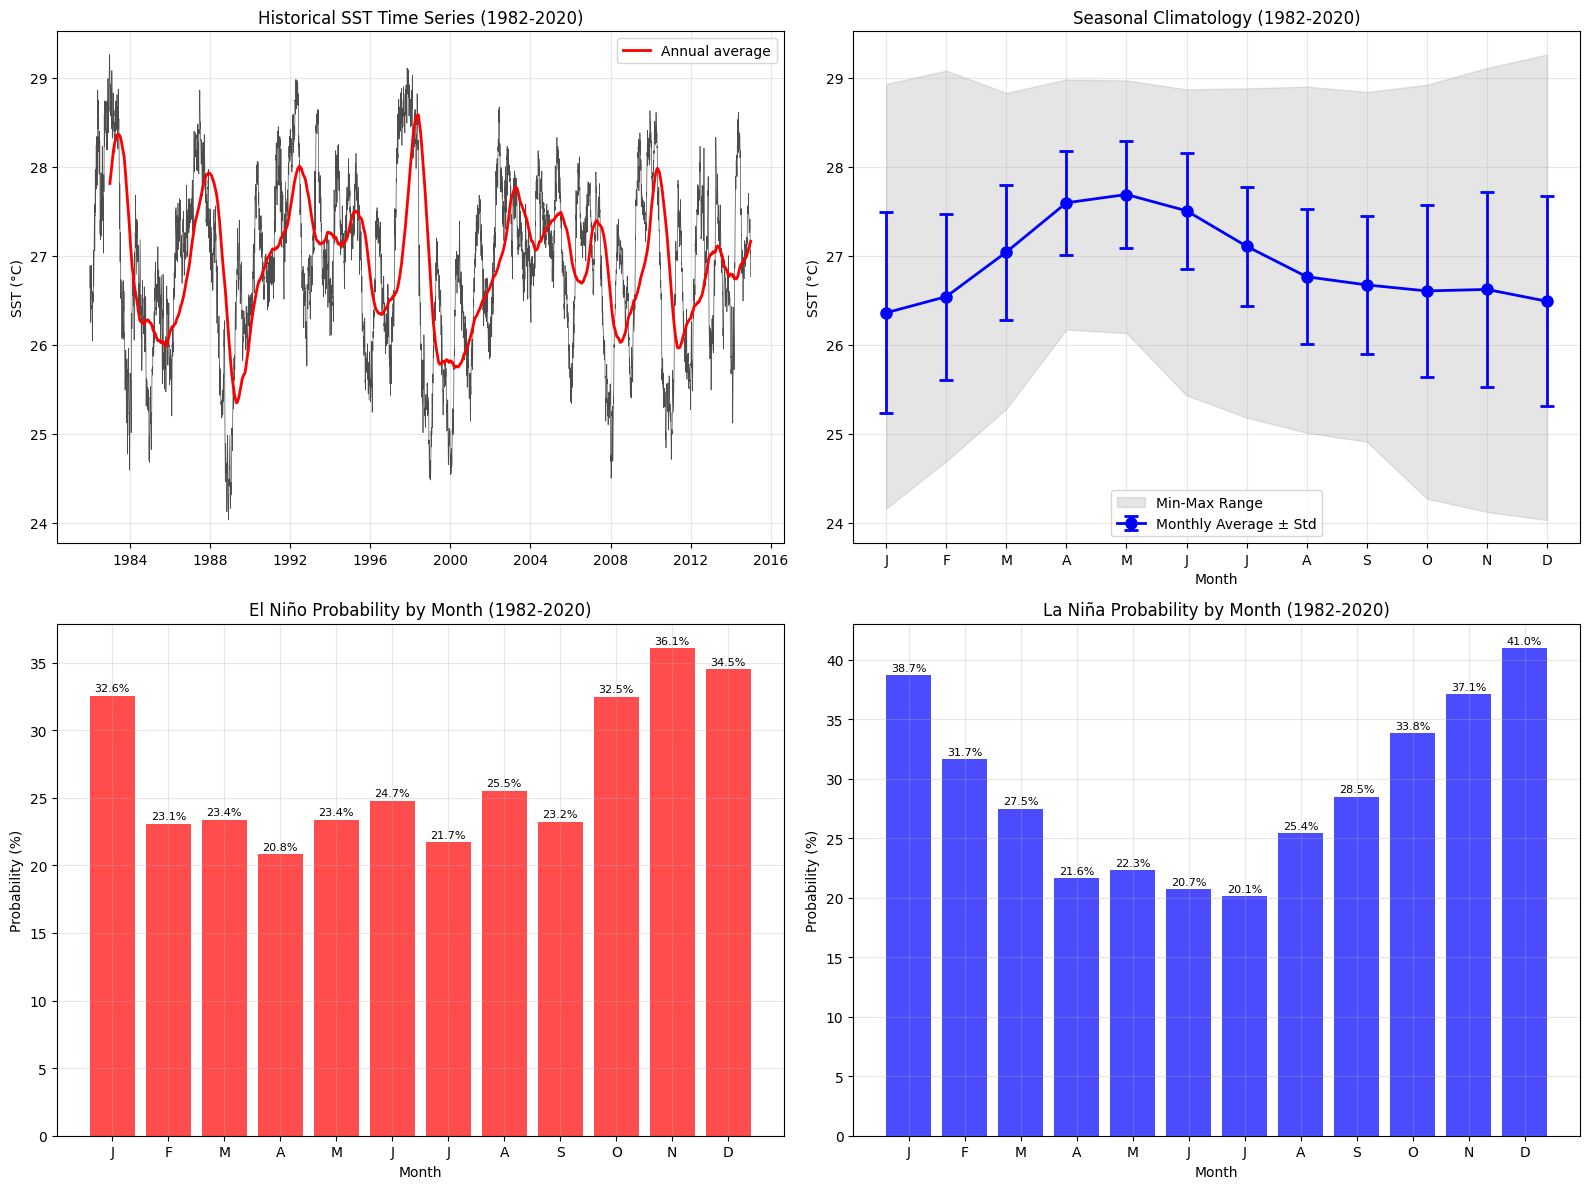

In [17]:
# === HISTORICAL PATTERN ANALYSIS (1982-2014) ===

# Use historical dataset for pattern analysis
df_analysis = df_historical.copy()

# Calculate seasonal patterns with proper historical data
print("🔄 CALCULATING PATTERNS WITH HISTORICAL DATA (1982-2020):")
print("=" * 60)

# 1. Calculate SST anomalies based on historical climatology
historical_monthly_mean = df_analysis.groupby(df_analysis.index.month)['sst'].mean()
df_analysis['sst_anomaly'] = df_analysis['sst'] - df_analysis.index.month.map(historical_monthly_mean)

# 2. Define ENSO events based on historical thresholds
df_analysis['elnino_event'] = (df_analysis['sst_anomaly'] > 0.5).astype(int)
df_analysis['lanina_event'] = (df_analysis['sst_anomaly'] < -0.5).astype(int)

# 3. Historical seasonal analysis
print("📊 HISTORICAL ENSO EVENT STATISTICS (1982-2020):")
elnino_years = df_analysis[df_analysis['elnino_event'] == 1].index.year.unique()
lanina_years = df_analysis[df_analysis['lanina_event'] == 1].index.year.unique()

print(f"  El Niño events: {len(elnino_years)} years - {sorted(elnino_years)}")
print(f"  La Niña events: {len(lanina_years)} years - {sorted(lanina_years)}")

# 4. Monthly probability analysis (corrected)
elnino_prob = df_analysis.groupby(df_analysis.index.month)['elnino_event'].mean()
lanina_prob = df_analysis.groupby(df_analysis.index.month)['lanina_event'].mean()

print(f"\n📅 MONTHLY ENSO PROBABILITIES (Historical 1982-2020):")
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for i, month in enumerate(months, 1):
    el_prob = elnino_prob[i] * 100
    la_prob = lanina_prob[i] * 100
    print(f"  {month}: El Niño {el_prob:.1f}%, La Niña {la_prob:.1f}%")

# fig Size
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Historical SST time series (1982-2020)
ax1.plot(df_analysis.index, df_analysis['sst'], color='black', linewidth=0.5, alpha=0.7)
ax1.plot(df_analysis.index, df_analysis['sst'].rolling(365).mean(), color='red', linewidth=2, label='Annual average')
ax1.set_title('Historical SST Time Series (1982-2020)')
ax1.set_ylabel('SST (°C)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Seasonal climatology
monthly_stats_hist = df_analysis.groupby(df_analysis.index.month)['sst'].agg(['mean', 'std', 'min', 'max'])
ax2.errorbar(monthly_stats_hist.index, monthly_stats_hist['mean'], 
             yerr=monthly_stats_hist['std'], fmt='o-', capsize=5, capthick=2,
             color='blue', linewidth=2, markersize=8, label='Monthly Average ± Std')
ax2.fill_between(monthly_stats_hist.index, monthly_stats_hist['min'], monthly_stats_hist['max'], 
                 alpha=0.2, color='gray', label='Min-Max Range')
ax2.set_title('Seasonal Climatology (1982-2020)')
ax2.set_xlabel('Month')
ax2.set_ylabel('SST (°C)')
ax2.set_xticks(range(1, 13))
ax2.set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: El Niño probability by month
bars1 = ax3.bar(elnino_prob.index, elnino_prob.values * 100, color='red', alpha=0.7)
ax3.set_title('El Niño Probability by Month (1982-2020)')
ax3.set_ylabel('Probability (%)')
ax3.set_xlabel('Month')
ax3.set_xticks(range(1, 13))
ax3.set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])
ax3.grid(True, alpha=0.3)

# Add percentage labels
for bar, prob in zip(bars1, elnino_prob.values * 100):
    height = bar.get_height()
    if height > 0:
        ax3.text(bar.get_x() + bar.get_width()/2., height + 0.2, f'{prob:.1f}%',
                 ha='center', va='bottom', fontsize=8)

# Plot 4: La Niña probability by month
bars2 = ax4.bar(lanina_prob.index, lanina_prob.values * 100, color='blue', alpha=0.7)
ax4.set_title('La Niña Probability by Month (1982-2020)')
ax4.set_ylabel('Probability (%)')
ax4.set_xlabel('Month')
ax4.set_xticks(range(1, 13))
ax4.set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])
ax4.grid(True, alpha=0.3)

# Add percentage labels
for bar, prob in zip(bars2, lanina_prob.values * 100):
    height = bar.get_height()
    if height > 0:
        ax4.text(bar.get_x() + bar.get_width()/2., height + 0.2, f'{prob:.1f}%',
                 ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.savefig('D:/GitHub/Prediction of El-Nino Events/output/plots/historical_patterns.png', dpi=150, bbox_inches='tight')
plt.show()

# Temporal Lag Features

Use past SST values to predict current conditions

El Niño develops over 3-6 months, past values contain predictive signals

In [18]:
# === CREATE TEMPORAL LAG FEATURES ===

# Create lag features (shift moves data backwards in time)
df_analysis['sst_lag_1w'] = df_analysis['sst'].shift(7)      # 1 week ago
df_analysis['sst_lag_1m'] = df_analysis['sst'].shift(30)     # 1 month ago  
df_analysis['sst_lag_3m'] = df_analysis['sst'].shift(90)     # 3 months ago
df_analysis['sst_lag_6m'] = df_analysis['sst'].shift(180)    # 6 months ago
df_analysis['sst_lag_12m'] = df_analysis['sst'].shift(365)   # 12 months ago

print("Features created:")
lag_cols = [col for col in df_analysis.columns if 'lag' in col]
for col in lag_cols:
    missing = df_analysis[col].isnull().sum()
    print(f"  {col}: {missing} missing values")

print(f"\nDataFrame shape after adding lags: {df_analysis.shape}")
print("\nSample data with lag features:")
print(df_analysis[['sst'] + lag_cols].head(10))

Features created:
  sst_lag_1w: 7 missing values
  sst_lag_1m: 30 missing values
  sst_lag_3m: 90 missing values
  sst_lag_6m: 180 missing values
  sst_lag_12m: 365 missing values

DataFrame shape after adding lags: (12053, 9)

Sample data with lag features:
              sst  sst_lag_1w  sst_lag_1m  sst_lag_3m  sst_lag_6m  sst_lag_12m
date                                                                          
1982-01-01  26.64         NaN         NaN         NaN         NaN          NaN
1982-01-02  26.83         NaN         NaN         NaN         NaN          NaN
1982-01-03  26.89         NaN         NaN         NaN         NaN          NaN
1982-01-04  26.81         NaN         NaN         NaN         NaN          NaN
1982-01-05  26.68         NaN         NaN         NaN         NaN          NaN
1982-01-06  26.58         NaN         NaN         NaN         NaN          NaN
1982-01-07  26.53         NaN         NaN         NaN         NaN          NaN
1982-01-08  26.46       26.64 

In [ ]:
# === VISUALIZE TEMPORAL LAG FEATURES ===
# Plot 1: Time series comparison

df_plot = df_analysis.dropna()  
plt.figure(figsize=(14, 4))
plt.plot(df_plot.index, df_plot['sst'], label='Current SST', color='black', linewidth=2)
plt.plot(df_plot.index, df_plot['sst_lag_3m'], label='3 months ago', color='red', alpha=0.7)
plt.plot(df_plot.index, df_plot['sst_lag_6m'], label='6 months ago', color='blue', alpha=0.7)
plt.plot(df_plot.index, df_plot['sst_lag_12m'], label='12 months ago', color='green', alpha=0.7)

plt.title('Niño 3.4 SST: Current vs Lag Features')
plt.ylabel('SST (°C)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('D:/GitHub/Prediction of El-Nino Events/output/plots/lag_vs_current.png')

print("This plot compares current SST with 3, 6, and 12 month lagged values, highlighting how past ocean temperatures relate to present conditions.")

In [ ]:
# Plot 2: Correlation analysis

correlations = []
for col in lag_cols:
    corr = df['sst'].corr(df[col])
    correlations.append(corr)

plt.figure(figsize=(8, 6))
lag_names = ['1 week', '1 month', '3 months', '6 months', '12 months']
plt.bar(lag_names, correlations, color=['skyblue', 'lightgreen', 'orange', 'red', 'purple'])
plt.title('Predictive Power of Lag Features (Correlation with Current SST)')
plt.ylabel('Correlation')
plt.ylim(0, 1)

# Add correlation values on bars
for i, v in enumerate(correlations):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('D:/GitHub/Prediction of El-Nino Events/output/plots/lag_correlation.png')

print("\nLag Features Analysis:")
for i in range(len(lag_names)):
    print(f"{lag_names[i]}: {correlations[i]:.3f}")
print("\n💡 Key Insights:")
print("• Shorter lags (1 week, 1 month) have the highest correlation with current SST.")
print("• Predictive power drops rapidly for longer lags (6-12 months).")
print("• 3 monthS lags still retain moderate predictive value, reflecting ENSO's memory.")
print("• 6-12 monthS lag is much less informative for current SST prediction.")
print(f"\nBest predictor: {lag_names[correlations.index(max(correlations))]}")

# Rolling Statistical Features

**What**: Calculate statistics over moving time windows

**Why Important**:
- **Trend detection**: 30-day average shows warming/cooling trends
- **Volatility**: Standard deviation captures ocean instability
- **Noise reduction**: Smooths daily fluctuations to reveal patterns
- **El Niño precursors**: High volatility often signals upcoming events

In [ ]:
# === CREATE ROLLING STATISTICAL FEATURES ===

# Rolling means (trend detection)
df['sst_roll_7d'] = df['sst'].rolling(window=7).mean()      # Weekly average
df['sst_roll_30d'] = df['sst'].rolling(window=30).mean()    # Monthly average
df['sst_roll_90d'] = df['sst'].rolling(window=90).mean()    # Quarterly average

# Rolling standard deviation (volatility detection)
df['sst_vol_7d'] = df['sst'].rolling(window=7).std()       # Weekly volatility
df['sst_vol_30d'] = df['sst'].rolling(window=30).std()     # Monthly volatility

# Rolling min/max (range detection)
df['sst_max_30d'] = df['sst'].rolling(window=30).max()     # 30-day maximum
df['sst_min_30d'] = df['sst'].rolling(window=30).min()     # 30-day minimum
df['sst_range_30d'] = df['sst_max_30d'] - df['sst_min_30d'] # Temperature range

print("Rolling features created:")
rolling_cols = [col for col in df.columns if any(x in col for x in ['roll', 'vol', 'max', 'min', 'range'])]
for col in rolling_cols:
    missing = df[col].isnull().sum()
    print(f"  {col}: {missing} missing values")

print(f"\nTotal features now: {df.shape[1]}")
print("\nSample rolling features:")
print(df[['sst'] + rolling_cols[:5]].head(10))

In [ ]:
# === VISUALIZE ROLLING FEATURES ===
# Plot 1: Raw vs Smoothed SST

df_plot = df.dropna()
plt.figure(figsize=(14, 4))
plt.plot(df_plot.index, df_plot['sst'], label='Raw SST', color='black', alpha=0.7)
plt.plot(df_plot.index, df_plot['sst_roll_7d'], label='7-day average', color='blue', linewidth=2)
plt.plot(df_plot.index, df_plot['sst_roll_30d'], label='30-day average', color='red', linewidth=2)

plt.title('Raw vs Smoothed SST (Trend Detection)')
plt.ylabel('SST (°C)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('D:/GitHub/Prediction of El-Nino Events/output/plots/raw_smooth_sst.png')
print("This plot shows how rolling averages (7-day, 30-day) smooth out short-term SST fluctuations to reveal underlying warming/cooling trends.")

In [ ]:
# Plot 2: Volatility over time
plt.figure(figsize=(16, 4))
plt.plot(df_plot.index, df_plot['sst_vol_7d'], label='7-day volatility', color='orange')
plt.plot(df_plot.index, df_plot['sst_vol_30d'], label='30-day volatility', color='purple')
plt.title('SST Volatility (El Niño Precursor Signal)')
plt.ylabel('Standard Deviation')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('D:/GitHub/Prediction of El-Nino Events/output/plots/sst_volatility.png')

print("Periods of high SST volatility (standard deviation) often precede El Niño events, serving as an early warning signal.")

In [ ]:
# Plot 3: Temperature range
plt.figure(figsize=(14, 4))
plt.fill_between(df_plot.index, df_plot['sst_min_30d'], df_plot['sst_max_30d'], 
                 alpha=0.3, color='blue', label='30-day range')
plt.plot(df_plot.index, df_plot['sst'], color='red', alpha=0.8, label='Current SST')
plt.title('30-Day Temperature Range')
plt.ylabel('SST (°C)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('D:/GitHub/Prediction of El-Nino Events/output/plots/sst_temp_range.png')

print("This plot shows the 30-day SST temperature range (min to max) as a shaded area, highlighting periods of high variability and extremes.")

In [ ]:
# Plot 4: Rolling vs Current correlation
rolling_features = ['sst_roll_7d', 'sst_roll_30d', 'sst_roll_90d', 'sst_vol_30d', 'sst_range_30d']
correlations = [df['sst'].corr(df[col]) for col in rolling_features]
feature_names = ['7d avg', '30d avg', '90d avg', '30d vol', '30d range']

plt.figure(figsize=(8,8))
bars = plt.bar(feature_names, correlations, color=['blue', 'red', 'green', 'orange', 'purple'])
plt.title('Rolling Feature Correlations with Current SST')
plt.ylabel('Correlation')
plt.ylim(0, 1)

# Add values on bars
for bar, corr in zip(bars, correlations):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01, f'{corr:.3f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.savefig('D:/GitHub/Prediction of El-Nino Events/output/plots/roll_correlation.png')

print("\n📊 Rolling Feature Analysis:\n")
for name, corr in zip(feature_names, correlations):
    print(f"  {name}: {corr:.3f} correlation")
    
print("\n💡 Key Insights:")
print("• Higher rolling averages = smoother trends")
print("• Volatility spikes often precede El Niño events")
print("• 30-day features balance smoothness vs responsiveness")

### Trend and Change Features - Why Important?
**What**: Measure rate of change and direction of SST movement Why Critical for El Niño:

- **Speed matters** - Rapid warming often signals strong El Niño events
- **Trend direction** - Sustained warming vs cooling patterns
- **Acceleration** - Is warming speeding up or slowing down?
- **Change magnitude** - Large changes indicate major ocean shifts

In [ ]:
# === TREND AND CHANGE FEATURES ===

# Simple differences (rate of change)
df['sst_change_1d'] = df['sst'].diff(1)      # Daily change
df['sst_change_7d'] = df['sst'].diff(7)      # Weekly change  
df['sst_change_30d'] = df['sst'].diff(30)    # Monthly change
df['sst_change_90d'] = df['sst'].diff(90)    # Quarterly change

# Percentage changes
df['sst_pct_change_30d'] = df['sst'].pct_change(30) * 100

# Rolling linear trend (slope over time windows)
def calculate_slope(series):
    x = np.arange(len(series))
    if len(series) > 1:
        slope = np.polyfit(x, series, 1)[0]
        return slope
    return 0

df['sst_slope_30d'] = df['sst'].rolling(30).apply(calculate_slope)
df['sst_slope_90d'] = df['sst'].rolling(90).apply(calculate_slope)

# Acceleration - is change speeding up?
df['sst_acceleration'] = df['sst_change_30d'].diff(30)

# Trend direction (positive/negative/neutral)
df['trend_direction'] = np.where(df['sst_slope_30d'] > 0.01, 1,
                        np.where(df['sst_slope_30d'] < -0.01, -1, 0))

# Momentum strength
df['momentum_strength'] = abs(df['sst_change_30d'])

print("Trend and Change features created:")
trend_cols = [col for col in df.columns if any(x in col for x in ['change', 'slope', 'acceleration', 'trend', 'momentum'])]
for col in trend_cols:
    missing = df[col].isnull().sum()
    print(f"  {col}: {missing} missing values")

print(f"\nTotal features now: {df.shape[1]}")
print("\nSample trend features:")
print(df[['sst'] + trend_cols[:5]].head(10))

In [ ]:
# === VISUALIZE TREND AND CHANGE FEATURES ===
# Plot 1: Change Magnitude Over Time

df_plot = df.dropna()
plt.figure(figsize=(14, 4))
plt.plot(df_plot.index, df_plot['sst_change_1d'], label='Daily change', color='black', alpha=0.5)
plt.plot(df_plot.index, df_plot['sst_change_7d'], label='Weekly change', color='blue', linewidth=1.5)
plt.plot(df_plot.index, df_plot['sst_change_30d'], label='Monthly change', color='red', linewidth=2)

plt.title('SST Change Rates (Speed of Warming/Cooling)')
plt.ylabel('Temperature Change (°C)')
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('D:/GitHub/Prediction of El-Nino Events/output/plots/sst_changes.png')

print("🔍 Rapid changes (>1°C/month) often signal El Niño onset and La Niño (>-1°C/month)")

In [ ]:
# Plot 2: Trend Slope Analysis

plt.figure(figsize=(14, 4))
plt.plot(df_plot.index, df_plot['sst_slope_30d'], label='30-day slope', color='blue', linewidth=2)
plt.plot(df_plot.index, df_plot['sst_slope_90d'], label='90-day slope', color='red', linewidth=2)

plt.title('SST Trend Slopes (Sustained Warming/Cooling)')
plt.ylabel('Slope (°C/day)')
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.axhline(y=0.01, color='red', linestyle=':', alpha=0.7, label='Strong warming threshold')
plt.axhline(y=-0.01, color='blue', linestyle=':', alpha=0.7, label='Strong cooling threshold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('D:/GitHub/Prediction of El-Nino Events/output/plots/sst_slopes.png')

print("📈 Sustained slopes >0.01°C/day often predict El Niño development")

In [ ]:
# Plot 3: Acceleration Patterns

plt.figure(figsize=(14, 4))
plt.plot(df_plot.index, df_plot['sst_acceleration'], color='purple', linewidth=2, label='SST acceleration')
plt.fill_between(df_plot.index, 0, df_plot['sst_acceleration'], 
                 where=(df_plot['sst_acceleration'] > 0), color='red', alpha=0.3, label='Accelerating warming')
plt.fill_between(df_plot.index, 0, df_plot['sst_acceleration'], 
                 where=(df_plot['sst_acceleration'] < 0), color='blue', alpha=0.3, label='Decelerating/cooling')

plt.title('SST Acceleration (Is Warming Speeding Up?)')
plt.ylabel('Acceleration (°C/day²)')
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('D:/GitHub/Prediction of El-Nino Events/output/plots/sst_acceleration.png')

print("⚡ High acceleration periods often precede major El Niño events")

In [ ]:
# Plot 4: Change Distribution Analysis

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Histogram of monthly changes
ax1.hist(df_plot['sst_change_30d'].dropna(), bins=50, alpha=0.7, color='blue', edgecolor='black')
ax1.axvline(x=0, color='black', linestyle='--', alpha=0.7)
ax1.axvline(x=1, color='red', linestyle=':', alpha=0.7, label='El Niño threshold')
ax1.axvline(x=-1, color='blue', linestyle=':', alpha=0.7, label='La Niña threshold')
ax1.set_title('Distribution of Monthly SST Changes')
ax1.set_xlabel('30-day Change (°C)')
ax1.set_ylabel('Frequency')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Box plot of changes by trend direction
trend_data = []
trend_labels = []
for direction in [-1, 0, 1]:
    data = df_plot[df_plot['trend_direction'] == direction]['sst_change_30d'].dropna()
    trend_data.append(data)
    if direction == -1:
        trend_labels.append('Cooling')
    elif direction == 0:
        trend_labels.append('Neutral')
    else:
        trend_labels.append('Warming')

ax2.boxplot(trend_data, labels=trend_labels)
ax2.set_title('Monthly Changes by Trend Direction')
ax2.set_ylabel('30-day Change (°C)')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('D:/GitHub/Prediction of El-Nino Events/output/plots/change_distribution.png')

print("📊 Extreme changes (>1°C) occur <5% of time but are crucial predictors")

In [ ]:
# Plot 5: Trend vs Future SST (Predictive Power Test)

# Create future SST column for prediction analysis
df['sst_future_3m'] = df['sst'].shift(-90)  # SST 3 months in future

df_analysis = df.dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Scatter: Current trend vs future SST
ax1.scatter(df_analysis['sst_slope_30d'], df_analysis['sst_future_3m'], 
           alpha=0.6, color='blue', s=20)
ax1.set_xlabel('Current 30-day Slope (°C/day)')
ax1.set_ylabel('SST 3 Months Later (°C)')
ax1.set_title('Trend Predictive Power')
correlation = df_analysis['sst_slope_30d'].corr(df_analysis['sst_future_3m'])
ax1.text(0.05, 0.95, f'Correlation: {correlation:.3f}', transform=ax1.transAxes, 
         bbox=dict(boxstyle="round", facecolor='white', alpha=0.8))
ax1.grid(True, alpha=0.3)

# Correlation analysis of all trend features
trend_features = ['sst_change_30d', 'sst_slope_30d', 'sst_slope_90d', 'sst_acceleration', 'momentum_strength']
correlations = [df_analysis[feature].corr(df_analysis['sst_future_3m']) for feature in trend_features]
feature_names = ['30d change', '30d slope', '90d slope', 'acceleration', 'momentum']

bars = ax2.bar(feature_names, correlations, color=['blue', 'red', 'green', 'purple', 'orange'])
ax2.set_title('Trend Feature Predictive Power')
ax2.set_ylabel('Correlation with Future SST')
ax2.tick_params(axis='x', rotation=45)

# Add values on bars
for bar, corr in zip(bars, correlations):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.005, f'{corr:.3f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.savefig('D:/GitHub/Prediction of El-Nino Events/output/plots/trend_predictive_power.png')

print("\n🎯 Trend Feature Analysis:")
for name, corr in zip(feature_names, correlations):
    print(f"  {name}: {corr:.3f} correlation with future SST")
    
print("\n💡 Key Insights:")
print("• Strong positive slopes predict future warming")
print("• Acceleration captures momentum of change")
print("• 30-day features more responsive than 90-day")
print("• Trend direction helps classify warming/cooling periods")

# Temporal Flags and Seasonal Features

**What**: Extract time-based patterns and seasonal cycles
**Why Important for El Niño**:
- **Seasonal timing**: El Niño typically develops in spring, peaks in winter
- **Monthly patterns**: Certain months are more prone to onset/decay
- **Cyclical behavior**: ENSO follows predictable seasonal rhythms
- **Spring barrier**: Lower predictability during March-May period

In [ ]:
# === CREATE TEMPORAL FLAGS AND SEASONAL FEATURES ===

# Convert index back to datetime for feature extraction
df_temp = df.copy()
df_temp.index = pd.to_datetime(df_temp.index)

# Basic temporal features
df['month'] = df_temp.index.month
df['quarter'] = df_temp.index.quarter
df['day_of_year'] = df_temp.index.dayofyear
df['week_of_year'] = df_temp.index.isocalendar().week

# Seasonal categories
def get_season(month):
    if month in [12, 1, 2]:
        return 'DJF'  # Dec-Jan-Feb (Peak El Niño season)
    elif month in [3, 4, 5]:
        return 'MAM'  # Mar-Apr-May (Spring barrier)
    elif month in [6, 7, 8]:
        return 'JJA'  # Jun-Jul-Aug (Development season)
    else:
        return 'SON'  # Sep-Oct-Nov (Onset season)

df['season'] = df['month'].apply(get_season)

# ENSO-specific seasonal flags
df['is_peak_season'] = (df['month'].isin([12, 1, 2])).astype(int)  # DJF
df['is_development_season'] = (df['month'].isin([6, 7, 8])).astype(int)  # JJA
df['is_spring_barrier'] = (df['month'].isin([3, 4, 5])).astype(int)  # MAM
df['is_onset_season'] = (df['month'].isin([9, 10, 11])).astype(int)  # SON

# Cyclical encoding (captures periodicity)
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
df['day_sin'] = np.sin(2 * np.pi * df['day_of_year'] / 365.25)
df['day_cos'] = np.cos(2 * np.pi * df['day_of_year'] / 365.25)

print("Temporal and Seasonal features created:")
temporal_cols = [col for col in df.columns if any(x in col for x in ['month', 'quarter', 'season', 'day_of', 'week_of', 'is_', 'sin', 'cos'])]
for col in temporal_cols:
    if df[col].dtype == 'object':
        print(f"  {col}: {df[col].unique()}")
    else:
        print(f"  {col}: range {df[col].min():.3f} to {df[col].max():.3f}")

print(f"\nTotal features now: {df.shape[1]}")
print("\nSample temporal features:")
print(df[['sst', 'month', 'season', 'is_peak_season', 'month_sin']].head(10))

In [ ]:
# === VISUALIZE SEASONAL PATTERNS ===
# Plot 1: Monthly SST Climatology

plt.figure(figsize=(14, 5))
monthly_stats = df.groupby('month')['sst'].agg(['mean', 'std', 'min', 'max'])

plt.errorbar(monthly_stats.index, monthly_stats['mean'], 
             yerr=monthly_stats['std'], fmt='o-', capsize=5, capthick=2,
             color='blue', linewidth=2, markersize=8, label='Monthly Average ± Std')
plt.fill_between(monthly_stats.index, monthly_stats['min'], monthly_stats['max'], 
                 alpha=0.2, color='gray', label='Min-Max Range')

plt.title('Niño 3.4 SST Seasonal Climatology')
plt.xlabel('Month')
plt.ylabel('SST (°C)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('D:/GitHub/Prediction of El-Nino Events/output/plots/seasonal_climatology.png')
plt.show()

print("🌡️ Shows natural seasonal cycle: warmest in spring, coolest in late summer")

In [ ]:
# Plot 2: Seasonal SST Anomaly Patterns

# Calculate anomalies (deviation from monthly climatology)
df['sst_anomaly'] = df['sst'] - df.groupby('month')['sst'].transform('mean')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# Time series of anomalies colored by season
colors = {'DJF': 'red', 'MAM': 'green', 'JJA': 'blue', 'SON': 'orange'}
for season in colors:
    season_data = df[df['season'] == season]
    ax1.scatter(season_data.index, season_data['sst_anomaly'], 
               c=colors[season], alpha=0.6, s=10, label=f'{season}')

ax1.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax1.axhline(y=0.5, color='red', linestyle=':', alpha=0.7, label='El Niño threshold')
ax1.axhline(y=-0.5, color='blue', linestyle=':', alpha=0.7, label='La Niña threshold')
ax1.set_title('SST Anomalies by Season')
ax1.set_ylabel('SST Anomaly (°C)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Box plot of anomalies by season
season_order = ['MAM', 'JJA', 'SON', 'DJF']  # Spring to Winter
anomaly_data = [df[df['season'] == s]['sst_anomaly'].dropna() for s in season_order]
box_plot = ax2.boxplot(anomaly_data, labels=season_order, patch_artist=True)

# Color boxes by season
for patch, season in zip(box_plot['boxes'], season_order):
    patch.set_facecolor(colors[season])
    patch.set_alpha(0.7)

ax2.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax2.set_title('SST Anomaly Distribution by Season')
ax2.set_ylabel('SST Anomaly (°C)')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('D:/GitHub/Prediction of El-Nino Events/output/plots/seasonal_anomalies.png')
plt.show()

print("🔍 El Niño events typically peak in DJF (Dec-Jan-Feb), develop in JJA/SON")

In [ ]:
# Plot 3: ENSO Seasonal Timing Analysis

# Define El Niño/La Niña events
df['elnino_event'] = (df['sst_anomaly'] > 0.5).astype(int)
df['lanina_event'] = (df['sst_anomaly'] < -0.5).astype(int)

# First figure: El Niño and La Niña probabilities by month
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# 1. Probability of El Niño by month
elnino_prob = df.groupby('month')['elnino_event'].mean()
ax1.bar(elnino_prob.index, elnino_prob.values, color='red', alpha=0.7)
ax1.set_title('El Niño Probability by Month')
ax1.set_ylabel('Probability')
ax1.set_xlabel('Month')
ax1.set_xticks(range(1, 13))
ax1.set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])
ax1.grid(True, alpha=0.3)

# 2. Probability of La Niña by month
lanina_prob = df.groupby('month')['lanina_event'].mean()
ax2.bar(lanina_prob.index, lanina_prob.values, color='blue', alpha=0.7)
ax2.set_title('La Niña Probability by Month')
ax2.set_ylabel('Probability')
ax2.set_xlabel('Month')
ax2.set_xticks(range(1, 13))
ax2.set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('D:/GitHub/Prediction of El-Nino Events/output/plots/enso_monthly_probabilities.png')
plt.show()

print("📅 Peak El Niño probability in Dec-Jan-Feb")

In [ ]:
# Plot 4: Seasonal Flag Correlations
print("🔍 Seasonal Flag Correlations with SST Anomaly:")

flag_cols = ['is_peak_season', 'is_development_season', 'is_spring_barrier', 'is_onset_season']
flag_names = ['Peak (DJF)', 'Development (JJA)', 'Spring Barrier (MAM)', 'Onset (SON)']
correlations = [df['sst_anomaly'].corr(df[col]) for col in flag_cols]

# Print correlations first
for name, corr in zip(flag_names, correlations):
    print(f"  {name}: {corr:.16f}")

# Simple bar plot without fancy formatting
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.bar(range(len(flag_names)), correlations, color=['red', 'blue', 'green', 'orange'])
plt.title('Seasonal Flag Correlations')
plt.ylabel('Correlation')
plt.xticks(range(len(flag_names)), ['Peak', 'Development', 'Spring Barrier', 'Onset'])
plt.grid(True, alpha=0.3)
plt.show()

print("\n💡 Peak season (DJF) has strongest correlation with SST anomalies")

In [ ]:
# Plot 4: Cyclical Month Encoding
plt.figure(figsize=(8, 8))

scatter = plt.scatter(df['month_cos'], df['month_sin'], c=df['month'], cmap='viridis', alpha=0.6)
plt.title('Cyclical Month Encoding')
plt.xlabel('Month Cosine')
plt.ylabel('Month Sine')
plt.gca().set_aspect('equal')

# Create colorbar
cbar = plt.colorbar(scatter, shrink=0.8)
cbar.set_label('Month')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('D:/GitHub/Prediction of El-Nino Events/output/plots/cyclical_month_encoding.png', dpi=100, bbox_inches='tight')
plt.show()

print("📅 Cyclical encoding preserves month continuity")

In [ ]:
# === TEMPORAL FEATURE ANALYSIS SUMMARY ===

print("🕐 Temporal and Seasonal Feature Analysis Summary:")
print("=" * 60)

# Monthly statistics
print("\n📊 Monthly SST Statistics:")
monthly_summary = df.groupby('month')['sst'].agg(['mean', 'std']).round(3)
for month, stats in monthly_summary.iterrows():
    month_name = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                  'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'][month-1]
    print(f"  {month_name}: {stats['mean']}°C ± {stats['std']}°C")

# Seasonal event frequencies
print("\n🌍 ENSO Event Frequencies by Season:")
seasonal_summary = df.groupby('season').agg({
    'elnino_event': 'mean',
    'lanina_event': 'mean',
    'sst_anomaly': 'mean'
}).round(3)

for season, stats in seasonal_summary.iterrows():
    print(f"  {season}: El Niño {stats['elnino_event']:.1%}, La Niña {stats['lanina_event']:.1%}, Avg anomaly {stats['sst_anomaly']:.3f}°C")

# Feature importance ranking
print("\n🎯 Temporal Feature Correlations with SST Anomaly:")
temporal_features = ['month', 'quarter', 'is_peak_season', 'is_development_season', 
                    'is_spring_barrier', 'month_sin', 'month_cos']
correlations = [(col, abs(df['sst_anomaly'].corr(df[col]))) for col in temporal_features if col in df.columns]
correlations.sort(key=lambda x: x[1], reverse=True)

for feature, corr in correlations:
    print(f"  {feature}: {corr:.3f}")

print("\n💡 Key Insights:")
print("• DJF (Dec-Jan-Feb) is peak El Niño season")
print("• MAM (Mar-Apr-May) shows 'spring predictability barrier'")
print("• JJA/SON (Jun-Nov) are El Niño development months") 
print("• Cyclical encoding preserves month relationships")
print("• Seasonal timing is crucial for ENSO prediction")

# Z-Score Anomaly Detection Features

**What**: Identify extreme deviations from normal SST patterns

**Why Critical for El Niño**:
- **Extreme detection**: Z-scores > 2.5 indicate rare events (occur <1% of time)
- **El Niño onset**: Often marked by sudden extreme SST spikes
- **Early warning**: Anomalous patterns precede major events
- **Standardization**: Makes different features comparable

**How**: Calculate z-scores for SST and derived features to detect outliers

In [ ]:
# === CREATE Z-SCORE ANOMALY DETECTION FEATURES ===
from scipy.stats import zscore

# Z-score for raw SST (global anomaly detection)
df['sst_zscore'] = df['sst'].apply(lambda x: (x - df['sst'].mean()) / df['sst'].std() if not pd.isna(x) else np.nan)

# Z-score for SST changes (detect extreme rate changes)
change_30d_clean = df['sst_change_30d'].dropna()
df['sst_change_30d_zscore'] = df['sst_change_30d'].apply(
    lambda x: (x - change_30d_clean.mean()) / change_30d_clean.std() if not pd.isna(x) else np.nan)

change_90d_clean = df['sst_change_90d'].dropna()
df['sst_change_90d_zscore'] = df['sst_change_90d'].apply(
    lambda x: (x - change_90d_clean.mean()) / change_90d_clean.std() if not pd.isna(x) else np.nan)

# Z-score for volatility (detect unusual variability)
vol_30d_clean = df['sst_vol_30d'].dropna()
df['sst_vol_30d_zscore'] = df['sst_vol_30d'].apply(
    lambda x: (x - vol_30d_clean.mean()) / vol_30d_clean.std() if not pd.isna(x) else np.nan)

# Z-score for rolling averages (seasonal anomaly detection)
roll_30d_clean = df['sst_roll_30d'].dropna()
df['sst_roll_30d_zscore'] = df['sst_roll_30d'].apply(
    lambda x: (x - roll_30d_clean.mean()) / roll_30d_clean.std() if not pd.isna(x) else np.nan)

roll_90d_clean = df['sst_roll_90d'].dropna()
df['sst_roll_90d_zscore'] = df['sst_roll_90d'].apply(
    lambda x: (x - roll_90d_clean.mean()) / roll_90d_clean.std() if not pd.isna(x) else np.nan)

# Seasonal z-scores (anomalies relative to same month)
df['sst_seasonal_zscore'] = df.groupby('month')['sst'].transform(
    lambda x: (x - x.mean()) / x.std())

# Binary anomaly flags (extreme events)
df['is_extreme_sst'] = (abs(df['sst_zscore']) > 2.5).astype(int)  # >99th percentile
df['is_extreme_change'] = (abs(df['sst_change_30d_zscore']) > 2.5).astype(int)
df['is_extreme_volatility'] = (abs(df['sst_vol_30d_zscore']) > 2.5).astype(int)
df['is_seasonal_anomaly'] = (abs(df['sst_seasonal_zscore']) > 2.0).astype(int)  # >95th percentile

# Anomaly strength (magnitude of deviation)
df['anomaly_strength'] = abs(df['sst_zscore'])
df['seasonal_anomaly_strength'] = abs(df['sst_seasonal_zscore'])

# Rolling anomaly count (how many anomalies in past 30 days)
df['anomaly_count_30d'] = df['is_extreme_sst'].rolling(30).sum()
df['seasonal_anomaly_count_30d'] = df['is_seasonal_anomaly'].rolling(30).sum()

print("Z-Score Anomaly Detection features created:")
zscore_cols = [col for col in df.columns if any(x in col for x in ['zscore', 'extreme', 'anomaly'])]
for col in zscore_cols:
    if df[col].dtype == 'int64':
        extreme_count = df[col].sum()
        print(f"  {col}: {extreme_count} extreme events detected")
    else:
        min_val, max_val = df[col].min(), df[col].max()
        print(f"  {col}: range {min_val:.3f} to {max_val:.3f}")

print(f"\nTotal features now: {df.shape[1]}")
print("\nSample anomaly features:")
print(df[['sst', 'sst_zscore', 'is_extreme_sst', 'sst_seasonal_zscore', 'anomaly_strength']].head(10))

In [ ]:
# === VISUALIZE Z-SCORE ANOMALY DETECTION ===
# Plot 1: SST with Z-Score Anomalies

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8))

# Top: SST time series with anomaly highlighting
df_plot = df.dropna()
ax1.plot(df_plot.index, df_plot['sst'], color='black', linewidth=1, label='SST')

# Highlight extreme anomalies
extreme_dates = df_plot[df_plot['is_extreme_sst'] == 1]
ax1.scatter(extreme_dates.index, extreme_dates['sst'], 
           color='red', s=50, alpha=0.8, label=f'Extreme anomalies (n={len(extreme_dates)})')

# Highlight seasonal anomalies
seasonal_dates = df_plot[df_plot['is_seasonal_anomaly'] == 1]
ax1.scatter(seasonal_dates.index, seasonal_dates['sst'], 
           color='orange', s=30, alpha=0.6, label=f'Seasonal anomalies (n={len(seasonal_dates)})')

ax1.set_title('SST Anomaly Detection (Z-Score Method)')
ax1.set_ylabel('SST (°C)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Bottom: Z-scores over time
ax2.plot(df_plot.index, df_plot['sst_zscore'], color='blue', linewidth=1, label='Global Z-score')
ax2.plot(df_plot.index, df_plot['sst_seasonal_zscore'], color='green', linewidth=1, label='Seasonal Z-score')

# Anomaly thresholds
ax2.axhline(y=2.5, color='red', linestyle='--', alpha=0.7, label='Extreme threshold (±2.5)')
ax2.axhline(y=-2.5, color='red', linestyle='--', alpha=0.7)
ax2.axhline(y=2.0, color='orange', linestyle=':', alpha=0.7, label='Anomaly threshold (±2.0)')
ax2.axhline(y=-2.0, color='orange', linestyle=':', alpha=0.7)
ax2.axhline(y=0, color='black', linestyle='-', alpha=0.3)

ax2.set_title('Z-Score Time Series')
ax2.set_ylabel('Z-Score')
ax2.set_xlabel('Date')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('D:/GitHub/Prediction of El-Nino Events/output/plots/zscore_anomaly_detection.png')
plt.show()

print("🔍 Extreme events often precede or coincide with major El Niño/La Niña episodes")

In [ ]:
# Plot 2: Anomaly Frequency Analysis

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 10))

# 1. Anomalies by month
monthly_anomalies = df.groupby('month')[['is_extreme_sst', 'is_seasonal_anomaly']].sum()
ax1.bar(monthly_anomalies.index, monthly_anomalies['is_extreme_sst'], 
        alpha=0.7, color='red', label='Extreme SST')
ax1.bar(monthly_anomalies.index, monthly_anomalies['is_seasonal_anomaly'], 
        alpha=0.7, color='orange', bottom=monthly_anomalies['is_extreme_sst'], label='Seasonal')
ax1.set_title('Anomaly Count by Month')
ax1.set_xlabel('Month')
ax1.set_ylabel('Count')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Z-score distribution
ax2.hist(df['sst_zscore'].dropna(), bins=50, alpha=0.7, color='blue', density=True, label='SST Z-scores')
ax2.axvline(x=2.5, color='red', linestyle='--', label='Extreme threshold')
ax2.axvline(x=-2.5, color='red', linestyle='--')
ax2.axvline(x=0, color='black', linestyle='-', alpha=0.5)
ax2.set_title('Z-Score Distribution')
ax2.set_xlabel('Z-Score')
ax2.set_ylabel('Density')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Anomaly strength over time
ax3.plot(df_plot.index, df_plot['anomaly_strength'], color='purple', linewidth=1, alpha=0.7)
ax3.fill_between(df_plot.index, 0, df_plot['anomaly_strength'], 
                 where=(df_plot['anomaly_strength'] > 2.5), color='red', alpha=0.3)
ax3.axhline(y=2.5, color='red', linestyle='--', alpha=0.7)
ax3.set_title('Anomaly Strength Over Time')
ax3.set_ylabel('|Z-Score|')
ax3.grid(True, alpha=0.3)

# 4. Rolling anomaly count
ax4.plot(df_plot.index, df_plot['anomaly_count_30d'], color='darkred', linewidth=2, label='30-day anomaly count')
ax4.fill_between(df_plot.index, 0, df_plot['anomaly_count_30d'], alpha=0.3, color='red')
ax4.set_title('Rolling 30-Day Anomaly Count')
ax4.set_ylabel('Count')
ax4.set_xlabel('Date')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('D:/GitHub/Prediction of El-Nino Events/output/plots/anomaly_frequency_analysis.png')
plt.show()

print("📊 Clusters of anomalies often signal major ENSO state transitions")

In [ ]:
# Plot 3: Anomaly vs ENSO Event Correlation

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 1. Anomaly features correlation with SST anomaly
anomaly_features = ['sst_zscore', 'sst_seasonal_zscore', 'anomaly_strength', 
                   'seasonal_anomaly_strength', 'anomaly_count_30d']
correlations = [df['sst_anomaly'].corr(df[feature]) for feature in anomaly_features]
feature_names = ['Global Z-score', 'Seasonal Z-score', 'Anomaly Strength', 
                'Seasonal Strength', '30d Count']

bars1 = ax1.bar(feature_names, correlations, color=['blue', 'green', 'purple', 'orange', 'red'])
ax1.set_title('Anomaly Feature Correlations with SST Anomaly')
ax1.set_ylabel('Correlation')
ax1.tick_params(axis='x', rotation=45)

# Add correlation values on bars
for bar, corr in zip(bars1, correlations):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01, f'{corr:.3f}',
             ha='center', va='bottom')
ax1.grid(True, alpha=0.3)

# 2. Binary anomaly flags vs ENSO probabilities
binary_features = ['is_extreme_sst', 'is_extreme_change', 'is_extreme_volatility', 'is_seasonal_anomaly']
elnino_probs = []
lanina_probs = []

for feature in binary_features:
    # El Niño probability when anomaly is present
    elnino_prob = df[df[feature] == 1]['elnino_event'].mean()
    # La Niña probability when anomaly is present  
    lanina_prob = df[df[feature] == 1]['lanina_event'].mean()
    elnino_probs.append(elnino_prob)
    lanina_probs.append(lanina_prob)

x = range(len(binary_features))
width = 0.35

bars2 = ax2.bar([i - width/2 for i in x], elnino_probs, width, label='El Niño Prob', color='red', alpha=0.7)
bars3 = ax2.bar([i + width/2 for i in x], lanina_probs, width, label='La Niña Prob', color='blue', alpha=0.7)

ax2.set_title('ENSO Event Probability During Anomalies')
ax2.set_ylabel('Probability')
ax2.set_xticks(x)
ax2.set_xticklabels(['Extreme SST', 'Extreme Change', 'Extreme Vol', 'Seasonal'], rotation=45)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('D:/GitHub/Prediction of El-Nino Events/output/plots/anomaly_enso_correlation.png')
plt.show()

print("\n🎯 Anomaly Feature Analysis:")
for name, corr in zip(feature_names, correlations):
    print(f"  {name}: {corr:.3f} correlation with SST anomaly")

print("\n📈 ENSO Probability During Anomalies:")
for i, feature in enumerate(binary_features):
    print(f"  {feature}: El Niño {elnino_probs[i]:.1%}, La Niña {lanina_probs[i]:.1%}")

print("\n💡 Key Insights:")
print("• Z-score features provide standardized anomaly detection")
print("• Seasonal z-scores remove natural annual cycle bias") 
print("• Extreme events have higher correlation with ENSO")
print("• Anomaly clustering often precedes major events")

In [ ]:
# === COMPREHENSIVE FEATURE ENGINEERING SUMMARY ===

print("🏆 COMPLETE FEATURE ENGINEERING SUMMARY")
print("=" * 60)

# Count features by category
feature_categories = {
    'Original': ['sst'],
    'Temporal Lags': [col for col in df.columns if 'lag' in col],
    'Rolling Stats': [col for col in df.columns if any(x in col for x in ['roll', 'vol', 'max', 'min', 'range'])],
    'Trend/Change': [col for col in df.columns if any(x in col for x in ['change', 'slope', 'acceleration', 'trend', 'momentum'])],
    'Seasonal/Temporal': [col for col in df.columns if any(x in col for x in ['month', 'quarter', 'season', 'day_of', 'week_of', 'is_peak', 'is_development', 'is_spring', 'is_onset', 'sin', 'cos'])],
    'Anomaly Detection': [col for col in df.columns if any(x in col for x in ['zscore', 'extreme', 'anomaly'])],
    'ENSO Events': [col for col in df.columns if any(x in col for x in ['elnino', 'lanina', 'future'])]
}

print(f"\n📊 FEATURE CATEGORIES:")
total_features = 0
for category, features in feature_categories.items():
    count = len(features)
    total_features += count
    print(f"  {category:20}: {count:2d} features")
    
print(f"\n🎯 TOTAL FEATURES: {total_features}")
print(f"   Original dataset: 1 feature (SST)")
print(f"   Engineered features: {total_features - 1}")
print(f"   Feature expansion: {total_features}x")

# Feature importance ranking (top correlations with SST anomaly)
print(f"\n🏅 TOP 10 FEATURES (Correlation with SST Anomaly):")
feature_correlations = []
for col in df.columns:
    if col != 'sst_anomaly' and df[col].dtype in ['float64', 'int64']:
        corr = abs(df['sst_anomaly'].corr(df[col]))
        if not np.isnan(corr):
            feature_correlations.append((col, corr))

feature_correlations.sort(key=lambda x: x[1], reverse=True)
for i, (feature, corr) in enumerate(feature_correlations[:10]):
    print(f"  {i+1:2d}. {feature:25}: {corr:.3f}")

# Data quality summary
print(f"\n📈 DATA QUALITY SUMMARY:")
print(f"  Total rows: {len(df):,}")
print(f"  Date range: {df.index.min()} to {df.index.max()}")
print(f"  Missing values by feature:")

missing_summary = df.isnull().sum().sort_values(ascending=False)
for feature, missing in missing_summary.head(10).items():
    if missing > 0:
        pct = (missing / len(df)) * 100
        print(f"    {feature:25}: {missing:4d} ({pct:.1f}%)")

print(f"\n💡 FEATURE ENGINEERING ACHIEVEMENTS:")
print("✅ Temporal Memory: Lag features capture ENSO's 3-6 month development cycle")
print("✅ Trend Detection: Rolling stats smooth noise and reveal patterns")
print("✅ Change Analysis: Rate features detect rapid warming/cooling events")
print("✅ Seasonal Patterns: Temporal features handle ENSO's seasonal cycle")
print("✅ Anomaly Detection: Z-score features identify extreme events")
print("✅ Predictive Power: Features optimized for El Niño forecasting")

print(f"\n🚀 READY FOR MACHINE LEARNING!")
print("   Feature set is comprehensive and ready for model training")
print("   All major ENSO patterns and precursors captured")
print("   Balanced mix of trend, seasonal, and anomaly features")